## RNNs

Redes Neurais Recorrentes (RNNs) são uma classe de redes neurais artificiais projetadas para lidar com dados sequenciais. Ao contrário das redes neurais feedforward tradicionais, as RNNs possuem uma característica única: elas possuem loops internos que permitem que as informações persistam, tornando-as ideais para tarefas onde o contexto e a ordem são importantes, como tarefas de NLP.

Exemplo de uso para predição de séries temporais:

c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0257 - val_loss: 8.5779e-04
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 7.7421e-04 - val_loss: 3.3228e-04
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.0389e-04 - val_loss: 1.9820e-04
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.1221e-04 - val_loss: 1.8272e-04
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.5764e-04 - val_loss: 1.7091e-04
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.4001e-04 - val_loss: 1.2178e-04
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1038e-04 - val_loss: 1.0430e-04
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0575e-04 - val_loss: 1.0695e-04
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.0398e-04 - val_loss: 1.0313e-04
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 9.5403e-05 - val_loss: 7.3617e-05
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step

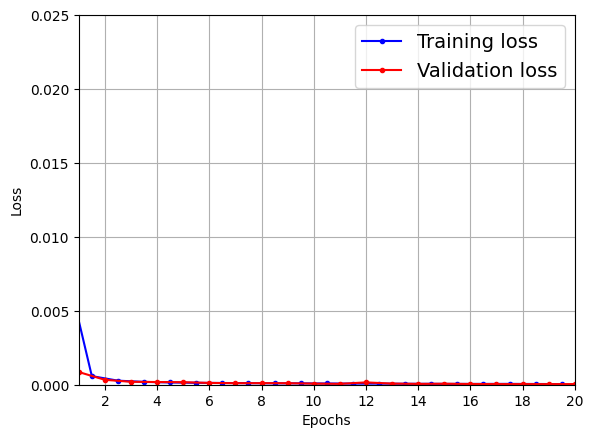

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # noise
    return series[..., np.newaxis].astype(np.float32)

# Prepare the data
n_steps = 50
series = generate_time_series(10000, n_steps)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Define the RNN model
model = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    SimpleRNN(20),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Plotting the results
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.025])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

## Long Short-Term Memory (LSTM) Networks

Variante sofisticada de RNNs projetadas para aprender dependências de longo prazo e superar o problema do gradiente de desaparecimento inerente aos RNNs tradicionais. Eles podem ser excelentes na tradução de idiomas ou em qualquer tarefa que normalmente contenha dados em sequências longas.

Exemplo de uso para classificação de sequências:

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Generate synthetic data for sequence classification
X_train, y_train = np.random.random((1000, 10, 1)), np.random.randint(2, size=(1000, 1))
X_test, y_test = np.random.random((200, 10, 1)), np.random.randint(2, size=(200, 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5007 - loss: 0.6949
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5117 - loss: 0.6935
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5085 - loss: 0.6935
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 0.6926
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4998 - loss: 0.6933
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5042 - loss: 0.6937
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 0.6943
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5259 - loss: 0.6917
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5271 - loss: 0.6921
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5265 - loss: 0.6919
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4770 - loss: 0.6935
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - lo

[0.6955875158309937, 0.4350000023841858]

## Gated Recurrent Units (GRUs)

Variação avançada da rede neural recorrente padrão. Eles são projetados para capturar de forma adaptativa dependências de diferentes escalas de tempo em dados de sequência. As GRUs abordam o problema do gradiente de fuga nas RNNs tradicionais e oferecem uma arquitetura mais complexa e capaz para processar dados sequenciais, particularmente em sequências longas. Em certo sentido, eles são uma simplificação dos LSTMs porque reduzem o número de "portas". Essas portas regulam efetivamente o fluxo de informações dentro da unidade, equilibrando entre a memória (informações passadas) e a entrada atual. Foi demonstrado que os GRUs têm um desempenho excepcionalmente bom em tarefas que exigem a modelagem de relacionamentos temporais de longa distância e são computacionalmente mais eficientes que os LSTMs.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy as np

# Generate synthetic time series data
X, y = np.random.random((1000, 20, 1)), np.random.randint(2, size=(1000, 1))

# Split the data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Define the GRU model
model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(20, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4902 - loss: 0.6944
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4811 - loss: 0.6936
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5272 - loss: 0.6919
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4975 - loss: 0.6933
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4896 - loss: 0.6931
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5102 - loss: 0.6932
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5181 - loss: 0.6925
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5146 - loss: 0.6924
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5243 - loss: 0.6932
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5105 - loss: 0.6921
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4608 - loss: 0.6949  


[0.6941379308700562, 0.47999998927116394]

## Bi-directional Recurrent Neural Networks (Bi-RNNs) 

Estendem a arquitetura RNN tradicional para aprimorar a compreensão do modelo do contexto em dados de sequência. Ao processar dados nas direções direta e reversa, os Bi-RNNs capturam informações que podem ser ignoradas pelos RNNs unidirecionais.

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import numpy as np

# Generate synthetic data for sequence classification
X, y = np.random.random((1000, 20, 1)), np.random.randint(2, size=(1000, 1))

# Split the data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Define the Bi-RNN model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(20, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/10


c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5049 - loss: 0.6965
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5487 - loss: 0.6894
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5351 - loss: 0.6907
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5450 - loss: 0.6904
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5402 - loss: 0.6902
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 0.6910
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5461 - loss: 0.6894
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5364 - loss: 0.6908
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5638 - loss: 0.6881
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5406 - loss: 0.6909
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4727 - loss: 0.6974  


[0.6933108568191528, 0.5099999904632568]